<b> Business Analytics: project description</b>
- The task is to help optimize marketing expenses of the website selling tickets to events.
- We need to find the source which is the most profitable (according to ROI rates). 
- We need to find out which is the best cohort, to know when to invest money in campaigns


<b>The Tables</b>
1. Visits: data about visits to the website
- device: what device was the visit made from
- start id: the time the visit began
- end ts: the time the visit ended
- source id: how did the visitor reach the website (through a specific campaign, organic, etc.)
- uid: user id
2. Orders: data about placing orders in the website
- buy ts: the time the order took place
- revenue: the sum of the order (which is, in the companies point of view, the income from the order)
- uid: user id
3. Costs: data about the costs of campaigns the website had
- source_id: the specific campaign, which in terms of visits in the websites, are the source the visitor came from
- dt: the date the campaign began
- costs: how much did the campaign costs

## Download the data and prepare it for analysis

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [2]:
# open local file, or (if failed) open in the yandex database
visits = pd.read_csv('visits_log_us.csv')
orders = pd.read_csv('orders_log_us.csv')
costs = pd.read_csv('costs_us.csv')

In [3]:
# find number of duplicates in each table
tables = [visits, orders, costs]

for table in tables:
    table.columns = [x.lower() for x in table.columns]
    print(table.columns)

Index(['device', 'end ts', 'source id', 'start ts', 'uid'], dtype='object')
Index(['buy ts', 'revenue', 'uid'], dtype='object')
Index(['source_id', 'dt', 'costs'], dtype='object')


In [4]:
for table in tables:
    display(table.duplicated().sum())

0

0

0

- There are no duplicates in the tables

In [5]:
# find number of missing values in each table
for table in tables:
    display(table.isna().sum())

device       0
end ts       0
source id    0
start ts     0
uid          0
dtype: int64

buy ts     0
revenue    0
uid        0
dtype: int64

source_id    0
dt           0
costs        0
dtype: int64

- There are no missing values in the data

## Visits to Website

In [6]:
# display first rows in the visits table
visits.head()

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [7]:
# display information about the visits table
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end ts     359400 non-null  object
 2   source id  359400 non-null  int64 
 3   start ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


### Monthly Visits

In [8]:
# add a month column to the visits table
visits['month'] = visits['start ts'].astype('datetime64[M]').dt.date

# create a table of dialy visits
mau = visits.groupby(visits['month'])['uid'].nunique().reset_index()
mau

,month,uid
0,2017-06-01,13259
1,2017-07-01,14183
2,2017-08-01,11631
3,2017-09-01,18975
4,2017-10-01,29692
5,2017-11-01,32797
6,2017-12-01,31557
7,2018-01-01,28716
8,2018-02-01,28749
9,2018-03-01,27473


<Figure size 864x504 with 0 Axes>

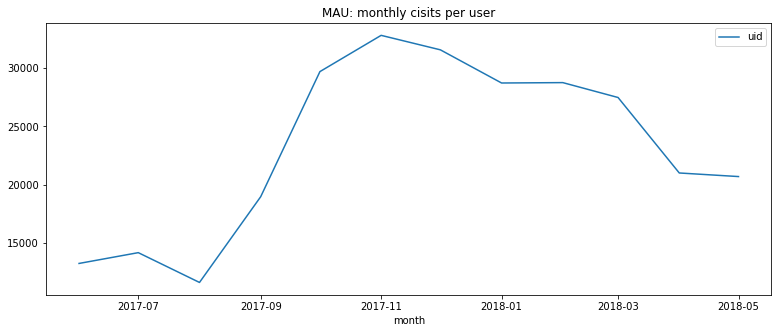

In [9]:
# graph the MAU
plt.figure(figsize=(12, 7))
mau.plot(kind='line', x='month', y='uid', title='MAU: monthly cisits per user', figsize=(13,5))
plt.show();

- The number of visits was higher between September 2017 and April 2018, with a peak in November.

### Weekly Visits

In [10]:
# add a week column to the visits table
visits['week'] = visits['start ts'].astype('datetime64[W]')

# create a table of daily visits
wau = visits.groupby(visits['week'])['uid'].nunique().reset_index()
wau.head(10)

,week,uid
0,2017-06-01,4082
1,2017-06-08,3311
2,2017-06-15,2844
3,2017-06-22,3079
4,2017-06-29,3055
5,2017-07-06,3563
6,2017-07-13,4790
7,2017-07-20,2978
8,2017-07-27,2505
9,2017-08-03,2343


<Figure size 864x504 with 0 Axes>

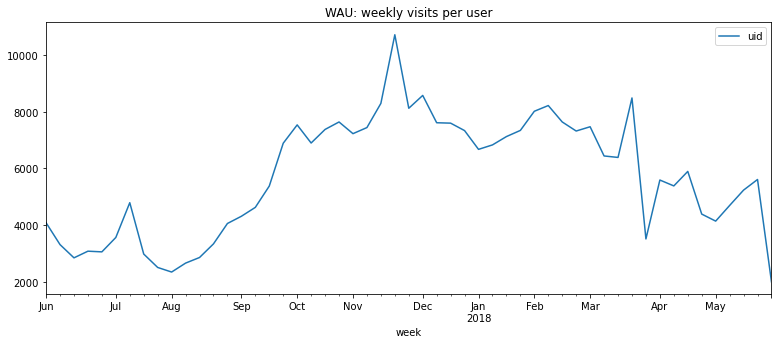

In [14]:
# graph the WAU
plt.figure(figsize=(12, 7))
wau.plot(kind='line', x='week', y='uid', title='WAU: weekly visits per user', figsize=(13,5))
plt.show();

- The most crowded weeks were in November, and the peak was in November 23rd week. 
- The peaks were in July 13th, October 5th, October 26th, November 23rd was the highest, December 7th, February 8th, March 22nd, April 5th and 9th, and May 24th.
- These peaks can be due to a special campaign at the time
- Notice that during the winter (roughly October to April) people visited more than in the real summer time, of July to September.

### Daily Visits

In [15]:
# add date column to visits df
visits['date'] = visits['start ts'].astype('datetime64[D]').dt.date

# create a table of daily visits
dau = visits.groupby('date')['uid'].nunique().reset_index()

dau.head()

,date,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


<Figure size 864x504 with 0 Axes>

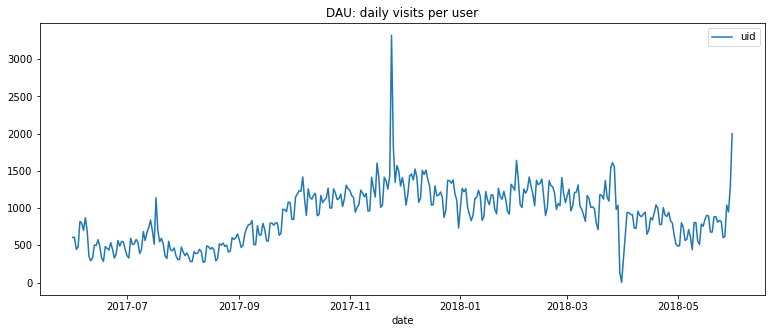

In [18]:
plt.figure(figsize=(12, 7))
dau.plot(kind='line', x='date', y='uid', title='DAU: daily visits per user', figsize=(13,5))
plt.show();

- Exceptionally high rate of visits was on November 24th. This was black Friday in which many websites offer crazy deals

#### Mean number

In [19]:
# the mean daily sessions per user
print('The mean daily sessions per userd is {:.2f}'.format(*dau.mean()))
print('The mean daily sessions in general is {:.2f}'.format(visits.groupby('date')['uid'].count().mean()))

The mean daily sessions per userd is 907.99
The mean daily sessions in general is 987.36


#### Daily Purchases

In [20]:
# change type of buy ts to datetime
orders['buy ts'] = orders['buy ts'].astype('datetime64').dt.date

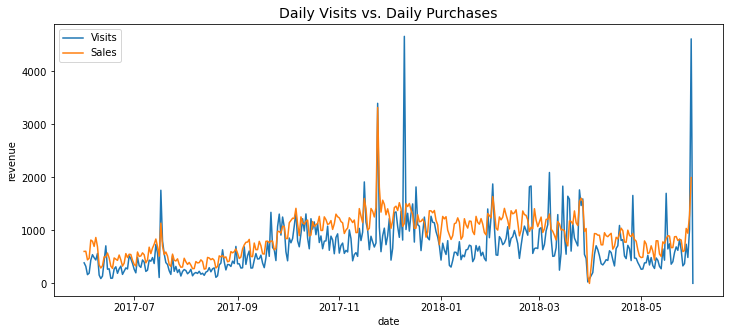

In [21]:
# create a dialy sales table
sales = orders.groupby('buy ts')['revenue'].sum().reset_index()
sales.columns = ['date', 'revenue']

# display lieplot for daily visits and daily sales
fig, ax= plt.subplots(figsize=(12,5))
ax= sns.lineplot(x= 'date', y= 'revenue', data=sales)
ax= sns.lineplot(x='date', y='uid', data=dau)
plt.title('Daily Visits vs. Daily Purchases', size=14)
ax.legend(['Visits', 'Sales'])
plt.show();

- The visits had a peak at the end of November and at the end of December
- The sales had a peak at the beginning of December
- Both visits and sales seem to peak on black Friday (November 24th, 2017)

### Length of visits

In [22]:
# change types of timestamp columns
visits['end ts'] = pd.to_datetime(visits['end ts'])
visits['start ts'] = pd.to_datetime(visits['start ts'])

visits['visit_length'] = (visits['end ts'] - visits['start ts']).dt.seconds

print('The common length of each session is {} seconds'.format(*visits['visit_length'].mode()))

The common length of each session is 60 seconds


- If the mode is 60 seconds (or one minute), it means that the most common visits don't include purchasing anything. 
- I suppose that other visits include purchasing
- Therefore, maybe some visits are a transfer from some source, without wanting to stay in the website

### Visits per Source

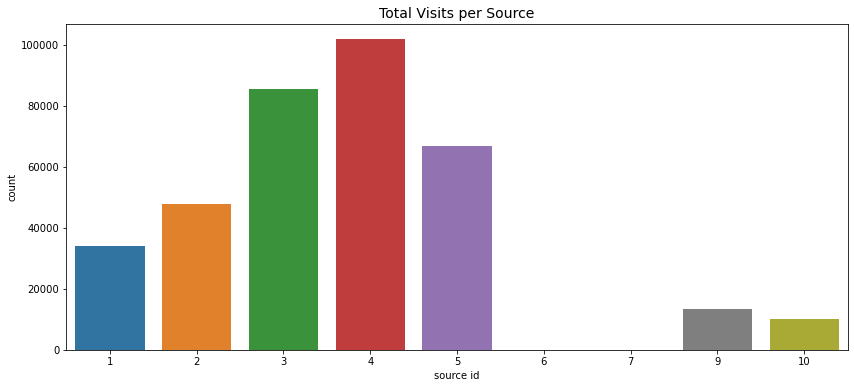

In [23]:
plt.subplots(figsize=(14,6))
sns.countplot(x='source id', data=visits)
plt.title('Total Visits per Source', size=14)
plt.show();

- Source 4 referred the most users to the website
- Source 3 did pretty well too
- The worst sources were 10 and 9

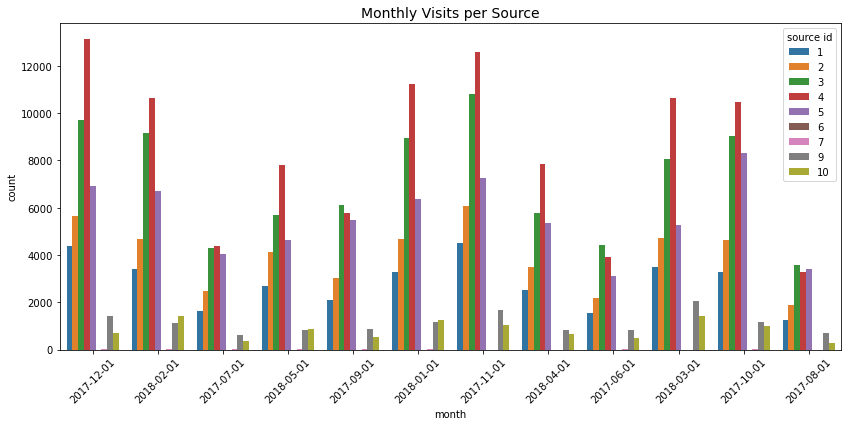

In [24]:
plt.subplots(figsize=(14,6))
sns.countplot(x='month', data=visits, hue= 'source id')
plt.title('Monthly Visits per Source', size=14)
plt.xticks(rotation=45)
plt.show();

- December had the most visits in the website. In December, source 4 yielded the most visits
- In almost all the months, source 4 was the one to bring the most visits, then source 3, and in the 3rd place source 5
- The months with the most visits were November, December and January to March.

### Retention
Retention is the measure of percentage of customers who return to the website after their first visit. This is measured according to the customers' lifetime, which measures how for many months since their first visits in the website do customers return to the website.

In [25]:
# make sure the start ts is the right type
visits['start ts'] = visits['start ts'].astype('datetime64')
first_visit = visits.groupby(['uid'])['start ts','source id'].min().reset_index()
first_visit.columns = ['uid','first_visit', 'first_source']

# change column first_visit to date
first_visit['first_visit'] = first_visit['first_visit'].dt.date

first_visit.head()

,uid,first_visit,first_source
0,11863502262781,2018-03-01,3
1,49537067089222,2018-02-06,2
2,297729379853735,2017-06-07,3
3,313578113262317,2017-09-18,2
4,325320750514679,2017-09-30,5


In [26]:
# adding first vist date info to visits table
visits = visits.merge(first_visit, on=['uid'], how='left')
visits.sort_values('uid')

,device,end ts,source id,start ts,uid,month,week,date,visit_length,first_visit,first_source
196543,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,11863502262781,2018-03-01,2018-03-01,2018-03-01,360,2018-03-01,3
257333,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,49537067089222,2018-02-01,2018-02-01,2018-02-06,120,2018-02-06,2
173818,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,297729379853735,2017-06-01,2017-06-01,2017-06-07,60,2017-06-07,3
113873,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,313578113262317,2018-03-01,2018-03-08,2018-03-11,360,2017-09-18,2
192554,desktop,2018-02-18 15:26:00,2,2018-02-18 15:17:00,313578113262317,2018-02-01,2018-02-15,2018-02-18,540,2017-09-18,2
...,...,...,...,...,...,...,...,...,...,...,...
175259,touch,2017-12-06 20:32:00,4,2017-12-06 20:32:00,18446424184725333426,2017-12-01,2017-11-30,2017-12-06,0,2017-12-06,4
293449,touch,2018-01-01 16:31:00,3,2018-01-01 16:29:00,18446556406699109058,2018-01-01,2017-12-28,2018-01-01,120,2018-01-01,3
319162,desktop,2017-12-27 14:08:00,4,2017-12-27 13:27:00,18446621818809592527,2017-12-01,2017-12-21,2017-12-27,2460,2017-12-27,4
222173,desktop,2018-05-21 09:45:00,4,2018-05-21 09:30:00,18446621818809592527,2018-05-01,2018-05-17,2018-05-21,900,2017-12-27,4


In [27]:
# change type of week column to the number of week, instead of the date
visits['week'] = pd.to_datetime(visits['week']).dt.week
visits.head()

,device,end ts,source id,start ts,uid,month,week,date,visit_length,first_visit,first_source
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,50,2017-12-20,1080,2017-12-20,4
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,7,2018-02-19,1680,2018-02-19,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,0,2017-07-01,5
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,20,2018-05-20,1440,2018-03-09,4
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,51,2017-12-27,0,2017-12-27,3


In [28]:
# building cohorts according to the frist visit month (monthly cohorts)
visits['cohort'] = visits['first_visit'].astype('datetime64[M]')

# cohort lifetime as months passed from first visit date to current date
visits['cohort_lifetime'] = np.floor((visits['date'] - visits['first_visit']) / np.timedelta64(1,'M'))
visits['cohort_lifetime']= visits['cohort_lifetime'].astype('int64')

visits.head()

,device,end ts,source id,start ts,uid,month,week,date,visit_length,first_visit,first_source,cohort,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,50,2017-12-20,1080,2017-12-20,4,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,7,2018-02-19,1680,2018-02-19,2,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,0,2017-07-01,5,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,20,2018-05-20,1440,2018-03-09,4,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,51,2017-12-27,0,2017-12-27,3,2017-12-01,0


In [29]:
# create a cohorts pivot table
cohorts = visits.pivot_table(index='cohort', columns='cohort_lifetime', values='uid', aggfunc='nunique').fillna(0)
display(cohorts)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,13259.0,778.0,740.0,890.0,898.0,907.0,794.0,729.0,715.0,620.0,534.0,434.0
2017-07-01,13140.0,674.0,736.0,703.0,747.0,608.0,620.0,576.0,406.0,364.0,228.0,0.0
2017-08-01,10181.0,626.0,621.0,591.0,450.0,428.0,416.0,313.0,267.0,134.0,0.0,0.0
2017-09-01,16704.0,1131.0,1058.0,691.0,661.0,625.0,477.0,396.0,178.0,0.0,0.0,0.0
2017-10-01,25977.0,1628.0,1135.0,996.0,894.0,651.0,530.0,273.0,0.0,0.0,0.0,0.0
2017-11-01,27248.0,1385.0,1134.0,989.0,741.0,586.0,298.0,0.0,0.0,0.0,0.0,0.0
2017-12-01,25268.0,1122.0,861.0,594.0,511.0,248.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,22624.0,979.0,682.0,497.0,205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-01,22197.0,771.0,503.0,226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Retention rates per cohort

In [30]:
retention = cohorts.iloc[:,0:].div(cohorts[0], axis=0).round(3)
display(retention)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,1.0,0.059,0.056,0.067,0.068,0.068,0.060,0.055,0.054,0.047,0.040,0.033
2017-07-01,1.0,0.051,0.056,0.054,0.057,0.046,0.047,0.044,0.031,0.028,0.017,0.000
2017-08-01,1.0,0.061,0.061,0.058,0.044,0.042,0.041,0.031,0.026,0.013,0.000,0.000
2017-09-01,1.0,0.068,0.063,0.041,0.040,0.037,0.029,0.024,0.011,0.000,0.000,0.000
2017-10-01,1.0,0.063,0.044,0.038,0.034,0.025,0.020,0.011,0.000,0.000,0.000,0.000
2017-11-01,1.0,0.051,0.042,0.036,0.027,0.022,0.011,0.000,0.000,0.000,0.000,0.000
2017-12-01,1.0,0.044,0.034,0.024,0.020,0.010,0.000,0.000,0.000,0.000,0.000,0.000
2018-01-01,1.0,0.043,0.030,0.022,0.009,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2018-02-01,1.0,0.035,0.023,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


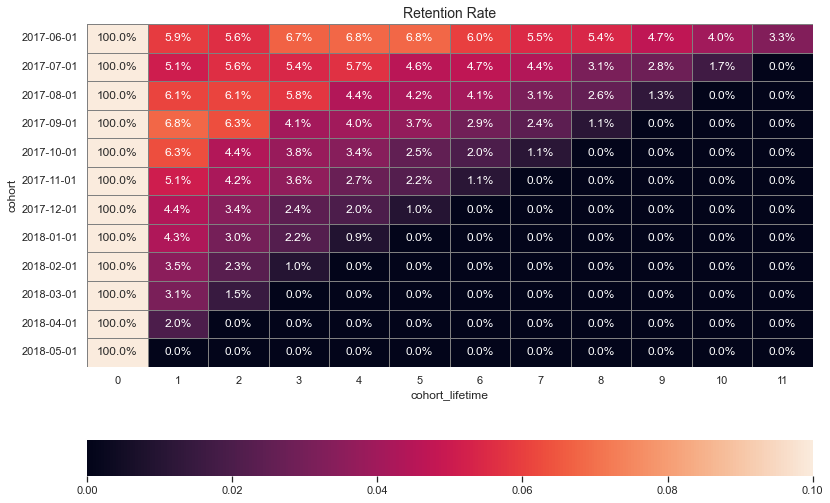

In [31]:
# heatmap of retentaion rate
sns.set(style='white')
plt.figure(figsize=(13, 9))

retention.index=retention.index.astype(str)
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey',  vmax=0.1, \
            cbar_kws= {'orientation': 'horizontal'})
plt.title('Retention Rate', size=14)
plt.show();

- The first month of the cohorts (month 0) has the highest retention rates, with 100%. That's when people had their first visit to the website
- In all the cohorts, overall the retention rates drop after the first month
- Note that 0.0% means that the cohort didn't reach this month yet (e.g., the October 2017 cohort did not reach its 9th month by May 2018; May 2018 is its 9th month)
- However, the numbers close to 0.0 but not quite are real rates that dropped very much
- The cohort which has the best 2nd month rate is September, and the best 6th month rate was in the June 2017 cohort.

In [32]:
# show customers who have many visits, to get an idea about how often customers come back to the website
visits['uid'].value_counts()[visits['uid'].value_counts()>=50]

12869801667763685675    893
3263486045884611639     615
11255648391090536411    551
17030528792926543083    357
8056418121947262981     343
                       ... 
6400496405622077579      51
1457537016336779203      51
5681945176678825559      51
11171561711096037819     50
14674916495068295851     50
Name: uid, Length: 154, dtype: int64

- 154 customers return to the website 50 times or more. This is good, but they are not many. We need to get all the customers to return many times, and to place orders.

## Orders


In [33]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [34]:
orders.head()

,buy ts,revenue,uid
0,2017-06-01,17.00,10329302124590727494
1,2017-06-01,0.55,11627257723692907447
2,2017-06-01,0.37,17903680561304213844
3,2017-06-01,0.55,16109239769442553005
4,2017-06-01,0.37,14200605875248379450


In [35]:
# add for each order the month it took place in
orders['order_month'] = orders['buy ts'].astype('datetime64[M]')

orders.sample(10)

,buy ts,revenue,uid,order_month
5677,2017-08-20,4.89,10839355953283505922,2017-08-01
16315,2017-11-06,4.28,11751156543780332305,2017-11-01
23965,2017-12-14,4.00,14305506491357022207,2017-12-01
15236,2017-10-29,4.89,3869100741261531231,2017-10-01
19373,2017-11-24,1.10,17063170725039603093,2017-11-01
37250,2018-02-27,7.94,17484085338676168742,2018-02-01
27381,2017-12-31,1.34,4484562162240853593,2017-12-01
14255,2017-10-23,3.54,1557808274499282116,2017-10-01
41616,2018-03-25,2.22,2473758057892393172,2018-03-01
27989,2018-01-04,6.82,6713174814357100761,2018-01-01


In [36]:
orders.groupby('order_month')['revenue'].sum().reset_index().sort_values('revenue', ascending=False)

,order_month,revenue
6,2017-12-01,36388.60
9,2018-03-01,28834.59
4,2017-10-01,27987.70
5,2017-11-01,27069.93
8,2018-02-01,25560.54
11,2018-05-01,20735.98
7,2018-01-01,19417.13
3,2017-09-01,18345.51
10,2018-04-01,16858.06
1,2017-07-01,12539.47


- Best sales occurred in December 2017
- Worst sales were in August 2017

In [37]:
# for each user, this is the date of first order
first_order=orders.groupby(['uid'])['buy ts'].min().reset_index()
first_order.columns = ['uid', 'first_order']
first_order.head()

,uid,first_order
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24


In [38]:
# adding the first order info to the orders table
orders = orders.merge(first_order,on=['uid'], how='left')

orders.sort_values('uid').tail(10)

,buy ts,revenue,uid,order_month,first_order
31426,2018-01-28,0.98,18440933819332658804,2018-01-01,2018-01-28
28284,2018-01-06,2.81,18442106212931715033,2018-01-01,2018-01-06
33109,2018-02-05,0.18,18442290965339407211,2018-02-01,2018-02-05
19096,2017-11-24,3.05,18445147675727495770,2017-11-01,2017-11-24
8919,2017-09-24,0.24,18445407535914413204,2017-09-01,2017-09-22
9023,2017-09-25,0.12,18445407535914413204,2017-09-01,2017-09-22
8707,2017-09-22,0.52,18445407535914413204,2017-09-01,2017-09-22
42213,2018-03-26,4.22,18445601152732270159,2018-03-01,2018-03-26
35572,2018-02-18,9.78,18446156210226471712,2018-02-01,2018-02-18
13176,2017-10-17,7.94,18446167067214817906,2017-10-01,2017-10-17


### Conversion
This is a measure of what percentage of the visitors actually place an order in the website.

In [39]:
# adding the first visit info to the orders table
orders = orders.merge(first_visit, on='uid', how='left')

orders.sample(10)

,buy ts,revenue,uid,order_month,first_order,first_visit,first_source
42724,2018-03-29,2.08,6916610542670061957,2018-03-01,2017-11-11,2017-11-11,5
39842,2018-03-14,4.28,4031530862406837675,2018-03-01,2018-03-14,2018-03-11,3
14788,2017-10-26,2.81,5307289053667996885,2017-10-01,2017-10-26,2017-10-26,5
13865,2017-10-21,0.98,12664192765643783198,2017-10-01,2017-10-21,2017-10-21,1
32209,2018-02-01,1.83,1084657631018188708,2018-02-01,2018-01-19,2018-01-19,2
40943,2018-03-21,0.92,11920452646463905188,2018-03-01,2017-06-03,2017-06-01,1
41868,2018-03-25,4.28,6268225112727843212,2018-03-01,2018-03-17,2017-08-25,1
11185,2017-10-06,5.13,4056381547939436330,2017-10-01,2017-10-05,2017-10-05,3
10877,2017-10-05,0.18,11171727274084046837,2017-10-01,2017-10-05,2017-09-29,1
19867,2017-11-25,2.67,15437178738890929311,2017-11-01,2017-11-25,2017-10-15,3


In [40]:
# note that now with the 0s, the first_visit column has dt and int values
# therefore, we will refer only to the dt values
orders['conversion_month'] = ((pd.to_datetime(orders['first_order']) - pd.to_datetime(orders['first_visit']))\
                            / np.timedelta64(1,'M')).apply(np.ceil).astype('int').apply(lambda x: 'first visit' if x==0 else x)

orders.sample(10)

,buy ts,revenue,uid,order_month,first_order,first_visit,first_source,conversion_month
30836,2018-01-24,2.43,9932933818818110388,2018-01-01,2018-01-24,2018-01-24,3,first visit
35379,2018-02-17,3.67,2162248437829538720,2018-02-01,2017-07-20,2017-07-20,2,first visit
29137,2018-01-12,3.05,970975784987511180,2018-01-01,2017-11-04,2017-06-09,1,5
43892,2018-04-12,0.35,2321416665565365981,2018-04-01,2018-04-12,2018-04-12,3,first visit
21099,2017-11-30,0.73,9218386441201176568,2017-11-01,2017-11-30,2017-11-30,4,first visit
9088,2017-09-25,1.47,4072263244424722806,2017-09-01,2017-09-25,2017-09-25,3,first visit
36070,2018-02-21,4.28,8644114613321846320,2018-02-01,2018-02-21,2018-02-21,3,first visit
29190,2018-01-13,6.11,9769853089791523371,2018-01-01,2018-01-13,2018-01-12,1,1
24450,2017-12-16,1.78,7017258868617430307,2017-12-01,2017-11-21,2017-11-21,3,first visit
16801,2017-11-09,13.75,16171098421908785411,2017-11-01,2017-11-09,2017-09-11,1,2


In [41]:
orders['conversion_month'].value_counts()

first visit    32334
1              10861
2               2050
3               1349
4               1244
5                843
6                617
7                440
8                292
9                167
10               114
11                60
12                44
Name: conversion_month, dtype: int64

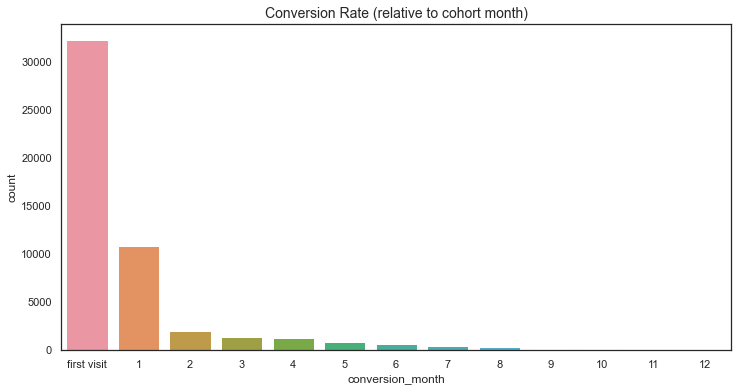

In [42]:
# histogram
plt.subplots(figsize=(12,6))
sns.countplot(x='conversion_month', data=orders)
plt.title('Conversion Rate (relative to cohort month)', size=14)
plt.show();

- Most users convert - that is, place an order - on their first visit. It just happens so
- Much less than that, but still more than other times, people buy in their first month on the website
- The first visit purchase can be due to having a really compelling website
- Or perhaps the source that referred people to the website was very convincing
- Maybe there were special deals at that time (which can be correlated with campaigns)
- As to lifetime, we see that as time passes people place less and less orders


It should be noted that these conversion times do not take into account visitors who did not place an order at all. They will be counted in the conversion rate calculation.

In [43]:
# the median conversion time (in months)
orders['conversion_month'] = orders['conversion_month'].apply(lambda x: 1 if x=='first visit' else x)
print('The median conversion month is', orders['conversion_month'].median())

The median conversion month is 1.0


In [44]:
# conversion rate
print('The conversion rate overall is {:.2f}%'.format((orders['uid'].nunique()*100 / visits['uid'].nunique())))

The conversion rate overall is 16.01%


### Cohort Analysis
Cohort in this project is the first time a customer placed an order. Cohorts are divided by months, so for each month, all the customers who placed their first orders in that month belong to that month's cohort. Diving customers to cohorts help us understand when people placed the most first orders, and what did these customers do since the first purchase.

In [45]:
# we will add the orders cohort and month columns
orders['orders_cohort'] = orders['first_order'].astype('datetime64[M]')

orders.sample(5)

,buy ts,revenue,uid,order_month,first_order,first_visit,first_source,conversion_month,orders_cohort
48771,2018-05-24,0.61,3207424953572601323,2018-05-01,2018-05-24,2018-05-24,4,1,2018-05-01
26423,2017-12-27,3.36,8139022135298460750,2017-12-01,2017-06-16,2017-06-04,1,1,2017-06-01
44291,2018-04-16,2.44,9881000636618840914,2018-04-01,2018-04-16,2018-04-16,3,1,2018-04-01
47734,2018-05-17,2.44,3105319168755802270,2018-05-01,2018-05-17,2018-05-17,5,1,2018-05-01
21089,2017-11-30,4.08,3441842197975623584,2017-11-01,2017-10-03,2017-10-03,3,1,2017-10-01


In [46]:
# checking types of columns to change their type if necessary
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   buy ts            50415 non-null  object        
 1   revenue           50415 non-null  float64       
 2   uid               50415 non-null  uint64        
 3   order_month       50415 non-null  datetime64[ns]
 4   first_order       50415 non-null  object        
 5   first_visit       50415 non-null  object        
 6   first_source      50415 non-null  int64         
 7   conversion_month  50415 non-null  int64         
 8   orders_cohort     50415 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(3), uint64(1)
memory usage: 4.9+ MB


In [47]:
# there is one record with first order date 2018-06-01. 
# since it's only one record, it may impact the data like an outlier, so I will get rid of it
# first change type of the column
orders['first_order'] = pd.to_datetime(orders['first_order'])

orders = orders.loc[orders['first_order'] <= '2018-05-31']
orders.tail()

,buy ts,revenue,uid,order_month,first_order,first_visit,first_source,conversion_month,orders_cohort
50409,2018-05-31,3.67,1805512004303848280,2018-05-01,2018-05-31,2017-12-07,1,6,2018-05-01
50410,2018-05-31,4.64,12296626599487328624,2018-05-01,2018-05-31,2018-05-31,4,1,2018-05-01
50411,2018-05-31,5.80,11369640365507475976,2018-05-01,2018-05-31,2018-05-31,10,1,2018-05-01
50412,2018-05-31,0.30,1786462140797698849,2018-05-01,2018-05-31,2018-05-31,3,1,2018-05-01
50413,2018-05-31,3.67,3993697860786194247,2018-05-01,2018-05-31,2017-10-23,3,8,2018-05-01


In [48]:
orders['lifetime'] = np.floor((pd.to_datetime(orders['buy ts']) - pd.to_datetime(orders['first_order'])) / \
                              np.timedelta64(1,'M')).astype('int64')
orders.sample(10)

,buy ts,revenue,uid,order_month,first_order,first_visit,first_source,conversion_month,orders_cohort,lifetime
3681,2017-07-17,9.78,5390385930680693544,2017-07-01,2017-07-17,2017-07-17,2,1,2017-07-01,0
16843,2017-11-09,2.75,5519571967486153769,2017-11-01,2017-11-09,2017-11-09,3,1,2017-11-01,0
36389,2018-02-22,3.50,11291585845813465678,2018-02-01,2018-02-22,2017-10-18,1,5,2018-02-01,0
7640,2017-09-13,2.44,7797044012795721872,2017-09-01,2017-09-13,2017-09-02,2,1,2017-09-01,0
22006,2017-12-05,0.73,4634949502354366875,2017-12-01,2017-12-05,2017-12-05,5,1,2017-12-01,0
7203,2017-09-08,4.40,15150287700352454454,2017-09-01,2017-09-08,2017-09-08,3,1,2017-09-01,0
27157,2017-12-30,1.82,5478807155063445257,2017-12-01,2017-12-30,2017-12-30,4,1,2017-12-01,0
10867,2017-10-05,1.95,3468240827210830680,2017-10-01,2017-10-05,2017-10-05,3,1,2017-10-01,0
20469,2017-11-27,0.43,6584597249582732790,2017-11-01,2017-11-27,2017-11-27,3,1,2017-11-01,0
25956,2017-12-25,1.53,16630562037738261661,2017-12-01,2017-12-25,2017-12-25,5,1,2017-12-01,0


In [49]:
# we will find the cohort size
orders_cohorts = orders.groupby('orders_cohort').agg({'uid': 'nunique', 'buy ts': 'count', 'revenue': 'sum'}).reset_index()
orders_cohorts.columns=['orders_cohort','cohort_size', 'n_orders', 'sum_sales']
orders_cohorts['avg_order_size'] = (orders_cohorts['sum_sales'] / orders_cohorts['n_orders']).round(2)
orders_cohorts['avg_orders_per_cust'] = (orders_cohorts['cohort_size'] / orders_cohorts['n_orders']).round(2)
orders_cohorts

,orders_cohort,cohort_size,n_orders,sum_sales,avg_order_size,avg_orders_per_cust
0,2017-06-01,2023,4438,24031.69,5.41,0.46
1,2017-07-01,1923,2910,16127.92,5.54,0.66
2,2017-08-01,1370,2188,11606.26,5.30,0.63
3,2017-09-01,2581,3878,34676.32,8.94,0.67
4,2017-10-01,4340,6005,27603.45,4.60,0.72
5,2017-11-01,4081,5900,26098.99,4.42,0.69
6,2017-12-01,4383,5894,33485.74,5.68,0.74
7,2018-01-01,3373,4308,16663.13,3.87,0.78
8,2018-02-01,3651,4470,16750.50,3.75,0.82
9,2018-03-01,3533,4484,19273.41,4.30,0.79


#### Average orders per customer

In [50]:
# change format of orders_cohort column
orders_cohorts['orders_cohort'] = pd.to_datetime(orders_cohorts['orders_cohort']).dt.date
orders_cohorts

,orders_cohort,cohort_size,n_orders,sum_sales,avg_order_size,avg_orders_per_cust
0,2017-06-01,2023,4438,24031.69,5.41,0.46
1,2017-07-01,1923,2910,16127.92,5.54,0.66
2,2017-08-01,1370,2188,11606.26,5.30,0.63
3,2017-09-01,2581,3878,34676.32,8.94,0.67
4,2017-10-01,4340,6005,27603.45,4.60,0.72
5,2017-11-01,4081,5900,26098.99,4.42,0.69
6,2017-12-01,4383,5894,33485.74,5.68,0.74
7,2018-01-01,3373,4308,16663.13,3.87,0.78
8,2018-02-01,3651,4470,16750.50,3.75,0.82
9,2018-03-01,3533,4484,19273.41,4.30,0.79


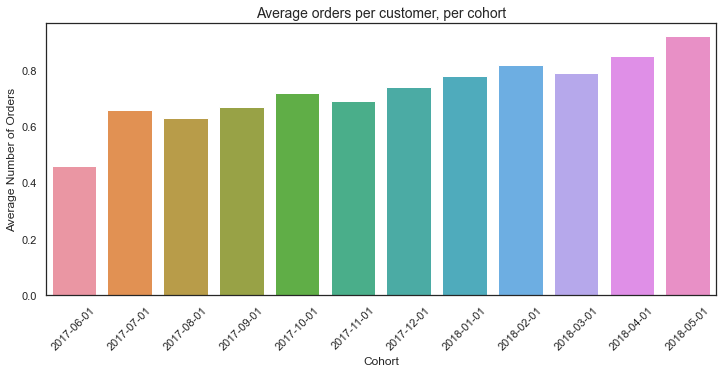

In [51]:
plt.figure(figsize=(12,5))
sns.barplot(x='orders_cohort', y='avg_orders_per_cust', data=orders_cohorts)
plt.title("Average orders per customer, per cohort", size=14)
plt.xlabel('Cohort')
plt.xticks(rotation=45)
plt.ylabel('Average Number of Orders')
plt.show()

- The best orders per customer rate belongs to the May 2018 cohort, then April 2018 and then February 2018
- The worst orders per customer rate belongs to June 2017, and then - but far from it - August 2017.

#### The average purchase size

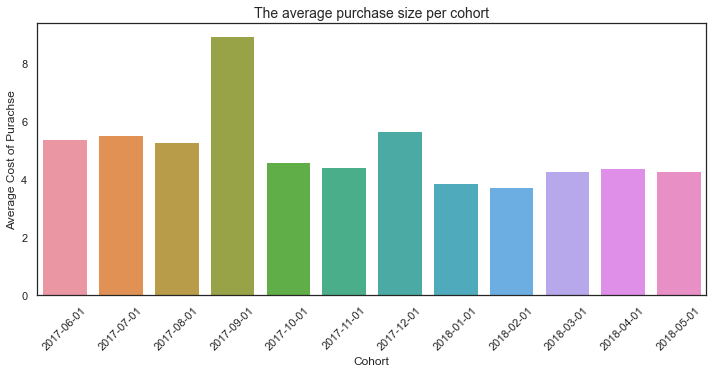

In [52]:
plt.figure(figsize=(12,5))
sns.barplot(x='orders_cohort', y='avg_order_size', data=orders_cohorts)
plt.title("The average purchase size per cohort", size=14)
plt.xlabel('Cohort')
plt.xticks(rotation=45)
plt.ylabel('Average Cost of Purachse')
plt.show()

- The best average purchase size rate belongs to September 2017 cohort. Then - and far from it - December 2017
- The worst rate is in January and February 2018 cohorts.

#### Sum of sales per Cohort

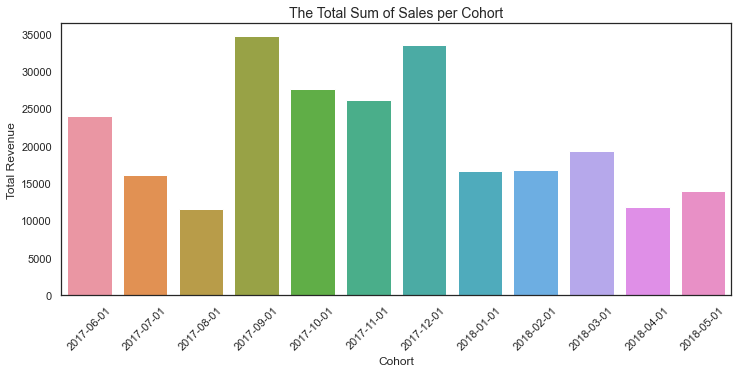

In [53]:
plt.figure(figsize=(12,5))
sns.barplot(x='orders_cohort', y='sum_sales', data=orders_cohorts)
plt.title("The Total Sum of Sales per Cohort", size=14)
plt.xlabel('Cohort')
plt.xticks(rotation=45)
plt.ylabel('Total Revenue')
plt.show()

- The overall revenue per cohort is the September 2017 cohort, and then December 2017
- The worst revenue is from August 2017 cohort

### Lifetime Value - LTV
Lifetime value is a measure of the revenue our website made from a whole lifetime of a customers. This is measured by cohorts, where lifetime is how many months were the customers active - that is, placing orders - in our website. LTV measures the value we gain from the customer overall their time on the website.

In [54]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   buy ts            50414 non-null  object        
 1   revenue           50414 non-null  float64       
 2   uid               50414 non-null  uint64        
 3   order_month       50414 non-null  datetime64[ns]
 4   first_order       50414 non-null  datetime64[ns]
 5   first_visit       50414 non-null  object        
 6   first_source      50414 non-null  int64         
 7   conversion_month  50414 non-null  int64         
 8   orders_cohort     50414 non-null  datetime64[ns]
 9   lifetime          50414 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(3), object(2), uint64(1)
memory usage: 4.2+ MB


In [55]:
ltv1 = orders.groupby(['orders_cohort', 'order_month']).agg({'revenue': 'sum'}).reset_index()
ltv1

,orders_cohort,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
73,2018-03-01,2018-04-01,1063.05
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92


In [56]:
# we will find the cohort size
cohort_sizes = orders_cohorts[['orders_cohort', 'cohort_size']]
cohort_sizes['orders_cohort'] = cohort_sizes['orders_cohort'].astype('datetime64[M]')
cohort_sizes

,orders_cohort,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [57]:
# merge tables
ltv1 = ltv1.merge(cohort_sizes,on=['orders_cohort'])
ltv1

,orders_cohort,order_month,revenue,cohort_size
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,2023
2,2017-06-01,2017-08-01,885.34,2023
3,2017-06-01,2017-09-01,1931.30,2023
4,2017-06-01,2017-10-01,2068.58,2023
...,...,...,...,...
73,2018-03-01,2018-04-01,1063.05,3533
74,2018-03-01,2018-05-01,1114.87,3533
75,2018-04-01,2018-04-01,10600.69,2276
76,2018-04-01,2018-05-01,1209.92,2276


In [58]:
ltv1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   orders_cohort  78 non-null     datetime64[ns]
 1   order_month    78 non-null     datetime64[ns]
 2   revenue        78 non-null     float64       
 3   cohort_size    78 non-null     int64         
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 3.0 KB


In [59]:
# add columns: lifetime, ltv
ltv1['lifetime'] = ((ltv1['order_month']- ltv1['orders_cohort'])/ np.timedelta64(1,'M')).round().astype('int64')
ltv1['ltv'] = (ltv1['revenue'] / ltv1['cohort_size']).round(2)
ltv1

,orders_cohort,order_month,revenue,cohort_size,lifetime,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0,4.72
1,2017-06-01,2017-07-01,981.82,2023,1,0.49
2,2017-06-01,2017-08-01,885.34,2023,2,0.44
3,2017-06-01,2017-09-01,1931.30,2023,3,0.95
4,2017-06-01,2017-10-01,2068.58,2023,4,1.02
...,...,...,...,...,...,...
73,2018-03-01,2018-04-01,1063.05,3533,1,0.30
74,2018-03-01,2018-05-01,1114.87,3533,2,0.32
75,2018-04-01,2018-04-01,10600.69,2276,0,4.66
76,2018-04-01,2018-05-01,1209.92,2276,1,0.53


In [60]:
# now we will have all the ltv data in a pivot table
ltv_cohort_pivot = ltv1.pivot_table(index='orders_cohort', columns='lifetime', values='ltv', aggfunc='sum').cumsum(axis=1)
ltv_cohort_pivot.fillna(0)

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
orders_cohort,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.40,0.00
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.37,7.58,7.99,8.28,8.47,0.00,0.00
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,0.00,0.00,0.00
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,0.00,0.00,0.00,0.00
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,0.00,0.00,0.00,0.00,0.00
2017-12-01,4.74,5.00,5.93,7.00,7.31,7.65,0.00,0.00,0.00,0.00,0.00,0.00
2018-01-01,4.14,4.43,4.73,4.87,4.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-02-01,4.16,4.44,4.52,4.59,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


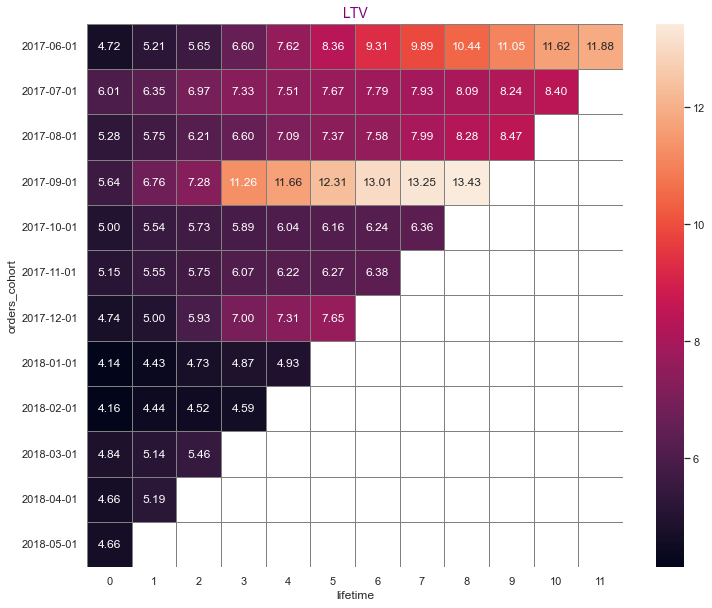

In [61]:
# heatmap of ltv cohort
ltv_cohort_pivot.index=ltv_cohort_pivot.index.astype(str)
plt.figure(figsize=(12, 10))
plt.title('LTV', size=14, color='purple')
sns.heatmap(ltv_cohort_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray');

- September's cohort was the best one, mostly because in their 4th month - which is December - there is a jump in the LTV rates. 
- Other cohorts pretty good cohorts are June and December. 
- The best first month LTV is in Jule cohort, and the best 6th month LTV rate is in September cohort

## Marketing

In [62]:
# read first rows in the file
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [63]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


### Money Spent on Marketing
#### Overall

In [64]:
# money spent overall
print('The total amount of money spent was', costs['costs'].sum())

The total amount of money spent was 329131.62


#### Per source

In [65]:
# money spent per source
cost_per_source = costs.groupby('source_id')['costs'].sum().reset_index().sort_values('source_id')

print('The money spent per source')
display(cost_per_source)

The money spent per source


,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


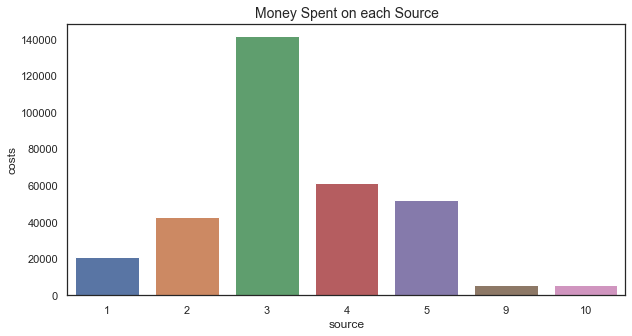

In [66]:
# plot of cost per source
plt.figure(figsize=(10, 5))
sns.barplot(data=cost_per_source, x='source_id', y='costs')
plt.title("Money Spent on each Source", size=14)
plt.xlabel('source')
plt.ylabel('costs');

- Source number 3 spent the highest amount on marketing, with ~140k
- Sources 9 and 10 spent the least
- Source 4 spent more than others - excluding source 3 - and numbers 5, 2 and 6 are next in numbers
- Note that source 1 spent relatively low coasts on campaigns. This is important because soon we will see its performances.

#### Monthly

In [67]:
# money spent over time
# change type of month column
costs['month'] = costs['dt'].astype('datetime64[M]').dt.date

# monthly cost per source
monthly_source = pd.pivot_table(costs, index='month',columns='source_id', values='costs', aggfunc='sum')
monthly_source

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


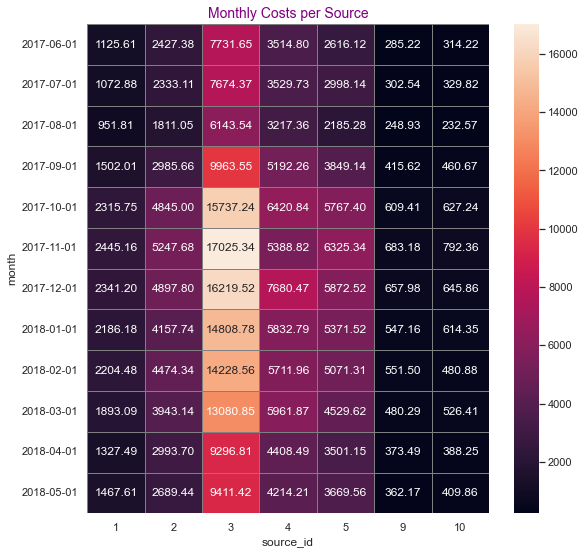

In [68]:
monthly_source.index=monthly_source.index.astype(str)
plt.figure(figsize=(9, 9))
plt.title('Monthly Costs per Source', size=14, color='purple')
sns.heatmap(monthly_source, annot=True, fmt='.2f', linewidths=1, linecolor='gray');

- November was the month in which overall the sources spent more money
- Source 3 spent the most money per month, in November

### Customer Acquisition Cost - CAC
Customer Acquisition Cost is a measure of how much did the company spend on campaign and trying to convince a customer to buy products, relative to the revenue from the customer. This is measured by the cohort, because we believe that there is a casual relationship between a campaign (and how much we spent on it) and a customer visit to the website. The process is spending money on a campaign (the source is a campaign related), the campaign brings the people to the website, then they place orders and come back to the website.
#### Monthly CAC rates

In [69]:
monthly_costs = costs.groupby('month')['costs'].sum().reset_index()
monthly_costs.columns=['month','monthly_cost']

monthly_costs

,month,monthly_cost
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [70]:
cust_per_month = orders.groupby('orders_cohort')['uid'].nunique().reset_index()
cust_per_month.columns= ['orders_cohort', 'cohort_size']

cust_per_month

,orders_cohort,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [71]:
monthly_costs['orders_cohort'] = pd.to_datetime(monthly_costs['month'])

In [72]:
# How much did customer acquisition from each of the sources cost? 
# merge tables
monthly_cac= cust_per_month.merge(monthly_costs, on='orders_cohort', how='left').drop(['month'], axis=1)
monthly_cac

,orders_cohort,cohort_size,monthly_cost
0,2017-06-01,2023,18015.00
1,2017-07-01,1923,18240.59
2,2017-08-01,1370,14790.54
3,2017-09-01,2581,24368.91
4,2017-10-01,4340,36322.88
5,2017-11-01,4081,37907.88
6,2017-12-01,4383,38315.35
7,2018-01-01,3373,33518.52
8,2018-02-01,3651,32723.03
9,2018-03-01,3533,30415.27


In [73]:
# cac column
monthly_cac['CAC'] = (monthly_cac['monthly_cost'] / monthly_cac['cohort_size']).round(2)
monthly_cac

,orders_cohort,cohort_size,monthly_cost,CAC
0,2017-06-01,2023,18015.00,8.91
1,2017-07-01,1923,18240.59,9.49
2,2017-08-01,1370,14790.54,10.80
3,2017-09-01,2581,24368.91,9.44
4,2017-10-01,4340,36322.88,8.37
5,2017-11-01,4081,37907.88,9.29
6,2017-12-01,4383,38315.35,8.74
7,2018-01-01,3373,33518.52,9.94
8,2018-02-01,3651,32723.03,8.96
9,2018-03-01,3533,30415.27,8.61


In [94]:
monthly_cac['orders_cohort'] = monthly_cac['orders_cohort'].dt.date

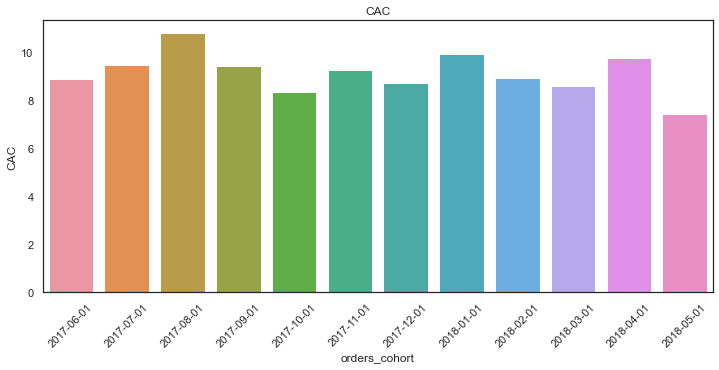

In [95]:
# plot
plt.figure(figsize=(12, 5))
sns.barplot(data=monthly_cac, x="orders_cohort", y="CAC")
plt.title('CAC')
plt.xticks(rotation=45)
plt.show();

- The lower the AC rate is - the best
- So, in May 2018 the CAC rate is low, which is good
- In August 2017 the CAC rate is high, which is bad, because it means we spent more money and resulted in less revenue

#### Monthly CAC per Source

In [ ]:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [124]:
monthly_costs_source = costs.groupby(['month', 'source_id'])['costs'].sum().reset_index()
monthly_costs_source.columns =['orders_cohort', 'source','costs']
monthly_costs_source['orders_cohort'] = monthly_costs_source['orders_cohort'].astype('datetime64[M]')

monthly_costs_source.head(10)

,orders_cohort,source,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
5,2017-06-01,9,285.22
6,2017-06-01,10,314.22
7,2017-07-01,1,1072.88
8,2017-07-01,2,2333.11
9,2017-07-01,3,7674.37


In [125]:
monthly_cust_source = orders[['orders_cohort', 'uid']].merge(first_visit[['uid', 'first_source']], on='uid', how='left')
monthly_cust_source.sample(10)

,orders_cohort,uid,first_source
25143,2017-12-01,17229439989523973127,1
45355,2018-04-01,17139383275825247737,3
38133,2018-03-01,12583248728640603085,1
17549,2017-11-01,6663154671218730671,2
49896,2018-05-01,1866277509836601327,1
2499,2017-07-01,3915674629732064175,1
14284,2017-10-01,4624748385149355124,3
40037,2018-03-01,8390959238825640625,2
28385,2018-01-01,18199253771370527511,3
9257,2017-08-01,440368630129513824,4


In [126]:
monthly_cust_source['first_source'].value_counts()

1     15308
3     11329
4      9252
2      7468
5      5483
10      953
9       620
7         1
Name: first_source, dtype: int64

In [127]:
monthly_cust_source = orders.groupby(['orders_cohort', 'first_source'])['uid'].nunique().reset_index()
monthly_cust_source.columns = ['orders_cohort', 'source', 'cohort_size']
monthly_cust_source.head(15)

,orders_cohort,source,cohort_size
0,2017-06-01,1,401
1,2017-06-01,2,334
2,2017-06-01,3,610
3,2017-06-01,4,314
4,2017-06-01,5,265
5,2017-06-01,9,35
6,2017-06-01,10,64
7,2017-07-01,1,400
8,2017-07-01,2,312
9,2017-07-01,3,460


In [128]:
monthly_costs_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   orders_cohort  84 non-null     datetime64[ns]
 1   source         84 non-null     int64         
 2   costs          84 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 KB


In [129]:
# monthly cac per source
monthly_cac_per_source = monthly_costs_source.merge(monthly_cust_source, on=['orders_cohort', 'source'])
monthly_cac_per_source.sample(10)

,orders_cohort,source,costs,cohort_size
62,2018-02-01,10,480.88,91
71,2018-04-01,2,2993.70,308
28,2017-10-01,1,2315.75,833
38,2017-11-01,4,5388.82,847
59,2018-02-01,4,5711.96,885
2,2017-06-01,3,7731.65,610
42,2017-12-01,1,2341.20,903
20,2017-08-01,10,232.57,23
68,2018-03-01,9,480.29,100
49,2018-01-01,1,2186.18,638


In [132]:
# add cac column
monthly_cac_per_source['CAC'] = (monthly_cac_per_source['costs'] / monthly_cac_per_source['cohort_size']).round(2)
cac_per_source_pivot = pd.pivot_table(monthly_cac_per_source, index='orders_cohort', columns='source', values='CAC', \
                                        aggfunc='sum')
cac_per_source_pivot

source,1,2,3,4,5,9,10
orders_cohort,,,,,,,
2017-06-01,2.81,7.27,12.67,11.19,9.87,8.15,4.91
2017-07-01,2.68,7.48,16.68,8.96,10.03,15.13,8.68
2017-08-01,3.30,9.95,19.38,11.79,8.44,9.22,10.11
2017-09-01,2.86,8.03,14.55,11.09,8.57,13.41,9.21
2017-10-01,2.78,7.80,13.94,7.03,8.86,11.50,4.48
2017-11-01,2.59,8.15,16.05,6.36,14.18,10.51,10.71
2017-12-01,2.59,7.99,13.66,7.16,11.86,10.97,12.19
2018-01-01,3.43,8.77,16.24,7.22,12.29,15.63,8.90
2018-02-01,3.41,9.28,13.98,6.45,10.50,11.99,5.28


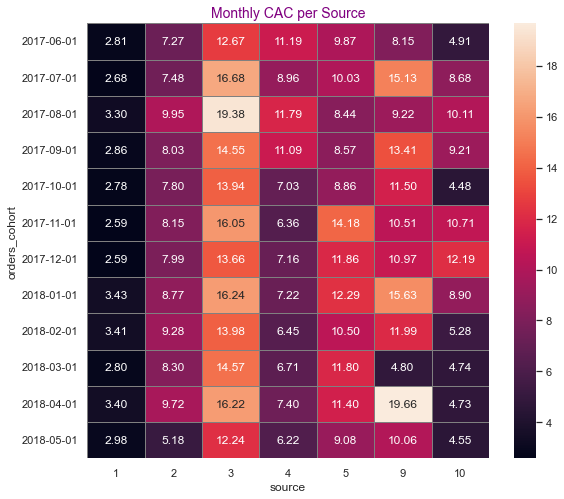

In [133]:
cac_per_source_pivot.index=cac_per_source_pivot.index.astype(str)
plt.figure(figsize=(9, 8))
plt.title('Monthly CAC per Source', size=14, color='purple')
sns.heatmap(cac_per_source_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray');

- Source 1 has the lowest CAC rate overall
- Source 3 has the highest CAC rate overall
- Per month and source, source 9 had a bad CAC rate on April 2018, and source 3 had a bad rate in August 2017
- Per month, May 2018 had the best CAC rates (that is, the smallest CAC)

### Return on Investment - ROI
This measures how long it takes for the website to return its costs in revenue. This is measured according to cohorts, checking how many months it takes for the website to earn money from customer of that cohort until the revenues are higher than the costs. So it actually checks how long does it take the website to make net profits.

ROI is calculated according to the LTV divided by the CAC. It checks the ratio of the cohort's value relative to its acquisition cost. When the number is greater than 1, we have a net profit.

In [139]:
# How worthwhile where the investments? (ROI)
ROI_columns = monthly_cac[['orders_cohort', 'CAC']]
ROI_columns['orders_cohort'] = ROI_columns['orders_cohort'].astype('datetime64[M]')

ROI = ltv1.merge(ROI_columns,on=['orders_cohort'],how='left')

In [140]:
# add ROI column
ROI['ROI'] = (ROI['ltv'] / ROI['CAC']).round(2)
ROI.head(15)

,orders_cohort,order_month,revenue,cohort_size,lifetime,ltv,CAC,ROI
0,2017-06-01,2017-06-01,9557.49,2023,0,4.72,8.91,0.53
1,2017-06-01,2017-07-01,981.82,2023,1,0.49,8.91,0.05
2,2017-06-01,2017-08-01,885.34,2023,2,0.44,8.91,0.05
3,2017-06-01,2017-09-01,1931.30,2023,3,0.95,8.91,0.11
4,2017-06-01,2017-10-01,2068.58,2023,4,1.02,8.91,0.11
5,2017-06-01,2017-11-01,1487.92,2023,5,0.74,8.91,0.08
6,2017-06-01,2017-12-01,1922.74,2023,6,0.95,8.91,0.11
7,2017-06-01,2018-01-01,1176.56,2023,7,0.58,8.91,0.07
8,2017-06-01,2018-02-01,1119.15,2023,8,0.55,8.91,0.06
9,2017-06-01,2018-03-01,1225.51,2023,9,0.61,8.91,0.07


In [141]:
ROI_pivot = ROI.pivot_table(index='orders_cohort', columns='lifetime', values='ROI', aggfunc='sum').cumsum(axis=1).round(2).fillna(0)
ROI_pivot

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
orders_cohort,,,,,,,,,,,,
2017-06-01,0.53,0.58,0.63,0.74,0.85,0.93,1.04,1.11,1.17,1.24,1.3,1.33
2017-07-01,0.63,0.67,0.74,0.78,0.80,0.82,0.83,0.84,0.86,0.88,0.9,0.00
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.69,0.71,0.75,0.78,0.80,0.0,0.00
2017-09-01,0.60,0.72,0.78,1.20,1.24,1.31,1.38,1.41,1.43,0.00,0.0,0.00
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.73,0.74,0.75,0.00,0.00,0.0,0.00
2017-11-01,0.55,0.59,0.61,0.64,0.66,0.67,0.68,0.00,0.00,0.00,0.0,0.00
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.88,0.00,0.00,0.00,0.00,0.0,0.00
2018-01-01,0.42,0.45,0.48,0.49,0.50,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2018-02-01,0.46,0.49,0.50,0.51,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00


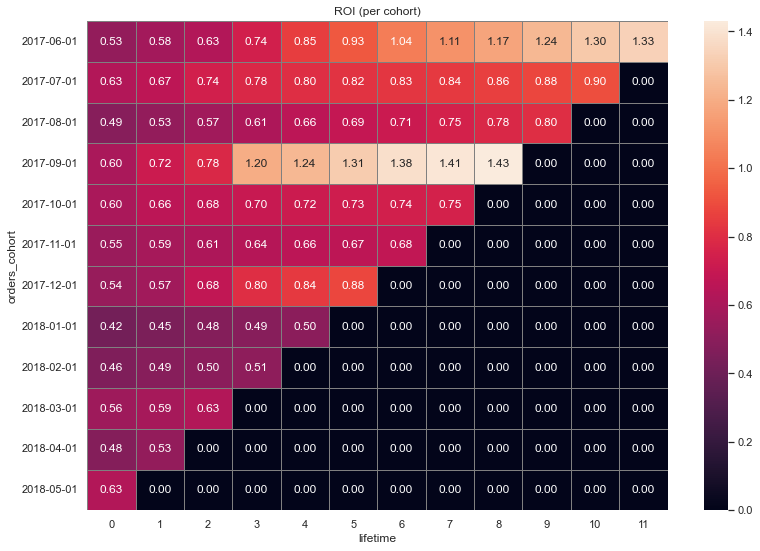

In [142]:
ROI_pivot.index=ROI_pivot.index.astype(str)
plt.figure(figsize=(13, 9))
sns.heatmap(ROI_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='grey').set(title ='ROI (per cohort)')
plt.show();

- September's cohort returns the money invested in it by the 4th month
- The best ROI rate for the first month is in 2018 May cohort
- January has the worst ROI rates, with only 0.57 by in the 5th month

### Advise marketing experts: how much money to invest and where

The best LTV rate is for September 2017 cohort, and then for June 2017 cohort.

Recall that after showing the monthly CAC rates per source, we came up with the following conclusions:
- Source 1 has the lowest CAC rate overall
- Per cohort, May 2018 had the best CAC rates (that is, the smallest CAC), and then March 2018

And according to the ROI rates, we know that:
- September's cohort returns the money invested in it by the 4th month
- The best ROI rate for the first month is in 2018 May cohort
- January has the worst ROI rates, with only 0.57 by in the 5th month


Recall the value counts of the first source in the visits table:

In [143]:
visits['first_source'].value_counts()

3     88318
4     81649
1     80285
5     48278
2     47921
10     6478
9      6441
7        29
6         1
Name: first_source, dtype: int64

And the value counts of the first source in the orders table:

In [144]:
# monthly costs per source
orders['first_source'].value_counts()

1     15308
3     11329
4      9252
2      7468
5      5483
10      953
9       620
7         1
Name: first_source, dtype: int64

Sources 1,3 and 4 brought the most visits, and the most orders. 

In [145]:
monthly_cac_per_source.groupby('source')['CAC'].sum().sort_values()

source
1      35.63
10     88.49
4      97.58
2      97.92
5     126.88
9     141.03
3     180.18
Name: CAC, dtype: float64

- Source 1 had the best overall (annually) CAC rates
- Source 3 had the worst CAC rates overall

In [147]:
monthly_cac_per_source.groupby('orders_cohort')['CAC'].sum().sort_values()

orders_cohort
2018-05-01    50.31
2018-03-01    53.72
2017-10-01    56.39
2017-06-01    56.87
2018-02-01    60.89
2017-12-01    66.42
2017-09-01    67.72
2017-11-01    68.55
2017-07-01    69.64
2017-08-01    72.19
2018-01-01    72.48
2018-04-01    72.53
Name: CAC, dtype: float64

- May 2018 had the best CAC rate overall. After that, MArch 2018
- The worst cohort WRT to CAC rate was April 2018, January 2018 and August 2017.

Now it's time to cross the information we've got:
- Sources with most visits are sources with most orders. However, the sum of each order is not necessarily high
- We need to consider the LTV rate: September 2017 cohort is the best, then June 2017
- The cohorts with lowest CAC rates are not necessarily the ones with highest ROI rates. September 2017 cohort had the best ROI rate overall, but WRT CAC it's somewhere in the middle. However, May 2018 can be the best cohort WRT CAC overall rates and ROI, but it is only one month old.

Recommendations:
- Best source: source 1
-- source 1 brought many visits and many orders
-- source 1 had the best CAC rates overall cohorts
- Best cohort: September cohort
-- May 2018 has a great potential. It's hard to say if the number will keep steady in the future, but according to its first month it had great performances.
-- If one month is not enough to deduct from, March 2018 cohort had also a good CAC rate
-- at to the ROI rate, September 2017 cohort had the most outstanding rate.

So, invest in source 1 in September, and then you will get good sales around the end of the year. Don't forget to make a special deal for Black Friday.